# 0. Configuration

In [77]:
#Importing libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pylab import rcParams
import seaborn as sb
import pingouin as pg
import scipy
from scipy import stats
from scipy.stats import spearmanr
import os
import textwrap

In [78]:
#Setting Style
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

# 1. Preparing Data: Deleting some things

## 1.1 Importing file 

In [79]:
#Importing Data and reading columns
survey_german = pd.read_csv('/Users/malv/Desktop/Blockchain_Adoption/Blockchain-Adoption-is-Driven-Externally/German_survey_anonymous.csv', skiprows=[1,1])
survey_english = pd.read_csv('/Users/malv/Desktop/Blockchain_Adoption/Blockchain-Adoption-is-Driven-Externally/English_survey_anonymous.csv', skiprows=[1,1])

#Create a dataframe called raw_data. It will be our main frame.
raw_data = pd.concat([survey_german,survey_english])


#Some Questionnaires were collected, although they were not finished. Exlude them.
#Q7 is the question regarding the blockchain stage. If this question was not answered, the respective row is exluded.
raw_data = raw_data[raw_data.Q7.notnull()]

#When exporting the results, Qualtrix used some wrong labels.
#E.g. for Q7, it labeled the answer 'none' with a '7', whereas it should be a '1'.
raw_data['Q7'] = raw_data['Q7'].replace([7],1)

#There are some unfinished questionnaires. We exclude them, by looking if one of the last answers were not answered.
raw_data = raw_data[raw_data.Q25_1.notnull()]

#Now let's get all the column names
item_list = []
for item in raw_data.iloc[:,:]:
        item_list.append(item)
        
print(item_list)

['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId', 'RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'ExternalReference', 'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 'UserLanguage', 'Q1', 'Q2', 'Q2_16_TEXT', 'Q40', 'Q4', 'Q6', 'Q6_6_TEXT', 'Q7', 'Q9', 'Q43', 'Q43_11_TEXT', 'Q13_1', 'Q13_2', 'Q13_3', 'Q13_4', 'Q14_1', 'Q14_2', 'Q14_3', 'Q14_4', 'Q15_1', 'Q15_2', 'Q15_3', 'Q15_4', 'Q18_1', 'Q18_2', 'Q18_3', 'Q19_1', 'Q19_2', 'Q19_3', 'Q20_1', 'Q20_2', 'Q20_3', 'Q21_1', 'Q21_2', 'Q21_3', 'Q21_4', 'Q21_5', 'Q21_6', 'Q21_7', 'Q21_8', 'Q21_9', 'Q21_10', 'Q22', 'Q23_1', 'Q23_2', 'Q23_3', 'Q24_1', 'Q24_2', 'Q25_1', 'Q25_2', 'Q25_3', 'Q25_4', 'Q25_5', 'Q26_1', 'Q26_2', 'Q28_1', 'Q28_2', 'Q28_3', 'Q28_4', 'Q28_5', 'Q28_6', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36']


## 1.2 Defining Columns

In [80]:
#Defining column names. The column names from above are renamed.
raw_data.columns =['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId', 'RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'ExternalReference', 'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 'UserLanguage', 
                 'org_yrs', 'cmpny_ind', 'Q2_16_TEXT', 'rolecmpny', 'bc_knwldg', 'bc_role', 'Q6_6_TEXT', 'bc_stage', 'bc_stopped', 'bc_usecase', 'Q43_11_TEXT', 
                 'RA1', 'RA2', 'RA3', 'RA4', 'cost1', 'cost2', 'cost3', 'cost4', 'cmptblty1', 'cmptblty2', 'cmptblty3', 'cmptblty4', 'cmplxty1', 'cmplxty2', 'cmplxty3', 'trblty1', 'trblty2', 'trblty3', 'obsvblty1', 'obsvblty2', 'obsvblty3', 
                 'org_rness1', 'org_rness2', 'org_rness3', 'org_rness4', 'org_rness5', 'org_rness6', 'org_rness7', 'org_rness8', 'org_rness9', 'org_rness10', 'nrfulltime', 'sen_mngm1', 'sen_mngm2', 'sen_mngm3', 
                 'comp_intsty1', 'comp_intsty2', 'pressure1', 'pressure2', 'pressure3', 'pressure4', 'pressure5', 'reg_unctnty1', 'reg_unctnty2', 'collab1', 'collab2', 'collab3', 'collab4', 'collab5', 'collab6', '#cust', '#cnty@cust', '#suppliers', '#cnty@supp', 'dpartmnt', 'Q34', 'Q35', 'Q36']
raw_data.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'org_yrs', 'cmpny_ind',
       'Q2_16_TEXT', 'rolecmpny', 'bc_knwldg', 'bc_role', 'Q6_6_TEXT',
       'bc_stage', 'bc_stopped', 'bc_usecase', 'Q43_11_TEXT', 'RA1', 'RA2',
       'RA3', 'RA4', 'cost1', 'cost2', 'cost3', 'cost4', 'cmptblty1',
       'cmptblty2', 'cmptblty3', 'cmptblty4', 'cmplxty1', 'cmplxty2',
       'cmplxty3', 'trblty1', 'trblty2', 'trblty3', 'obsvblty1', 'obsvblty2',
       'obsvblty3', 'org_rness1', 'org_rness2', 'org_rness3', 'org_rness4',
       'org_rness5', 'org_rness6', 'org_rness7', 'org_rness8', 'org_rness9',
       'org_rness10', 'nrfulltime', 'sen_mngm1', 'sen_mngm2', 'sen_mngm3',
       'comp_intsty1', 'comp_intsty2', 'pressure1', 'pressur

# 2. Data Cleansing

In [81]:
#Again Qualtrix labeled some answers incorrectly and therefore some questions skip some values.
#E.g. collab2 goes up to 6 although the range was from 1-5. It simply skipped the '5' value and labeled those answers with a '6'.
raw_data.iloc[:,17:-3].describe()


,org_yrs,cmpny_ind,rolecmpny,bc_knwldg,bc_role,bc_stage,bc_stopped,RA1,RA2,RA3,...,collab2,collab3,collab4,collab5,collab6,#cust,#cnty@cust,#suppliers,#cnty@supp,dpartmnt
count,346.000000,346.000000,346.000000,346.000000,341.000000,346.000000,8.00000,346.000000,346.000000,346.000000,...,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.00000,346.000000,346.000000,346.000000
mean,3.638728,8.910405,4.106936,2.176301,3.674487,2.407514,2.25000,3.216763,3.445087,3.263006,...,4.800578,4.445087,4.132948,4.265896,3.919075,3.161850,2.00578,2.254335,1.722543,14.696532
std,0.733941,4.169671,4.104802,0.742588,1.492006,1.529934,1.28174,0.885868,0.994851,1.031485,...,0.934430,1.009314,1.159566,1.062589,1.389123,1.465483,1.61334,1.322732,1.009181,2.941525
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,10.000000
25%,4.000000,6.000000,2.000000,2.000000,3.000000,1.000000,1.00000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,1.00000,1.000000,1.000000,12.000000
50%,4.000000,8.000000,2.000000,2.000000,4.000000,2.000000,2.00000,3.000000,3.000000,3.000000,...,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.00000,2.000000,1.000000,14.000000
75%,4.000000,12.000000,3.000000,3.000000,4.000000,3.000000,3.25000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.00000,3.000000,2.000000,17.000000
max,4.000000,16.000000,12.000000,3.000000,6.000000,6.000000,4.00000,5.000000,5.000000,5.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,6.00000,5.000000,4.000000,20.000000


In [82]:
#Abobve we see that there are some anomalies. Some ranges (2-6) go further than Likert scale (1-5)
#Let's look at at scales and identify anomalies. Therefore, we look at the unique answers per question. 
for col in raw_data:
    print(col, raw_data[col].unique())

StartDate [0]
EndDate [0]
Status [0]
IPAddress [0]
Progress [  0 100]
Duration (in seconds) [0]
Finished [0]
RecordedDate [0]
ResponseId [0]
RecipientLastName [0]
RecipientFirstName [ 0. nan]
RecipientEmail [ 0. nan]
ExternalReference [ 0. nan]
LocationLatitude [0]
LocationLongitude [0]
DistributionChannel [0]
UserLanguage [0]
org_yrs [2. 3. 4. 1.]
cmpny_ind [ 6. 15. 12.  4. 14.  7. 11. 16.  8.  1.  2. 10.  5.  3. 13.  9.]
Q2_16_TEXT [nan 'büro' 'ausbildung' 'PR' 'Medien ' 'Kultur' 'Erwachsenenbildung'
 'dienstleistung' 'Spielaren' 'Versorgung' 'Bestattungen ' 'Bildung'
 'Werbung' 'Dienstleistungen' 'Dienstleistung'
 'Umbrella Organization, Environment' 'University' 'Energy'
 'Auditing, Accounting and Advisory' 'Intellectual Property Law Firm'
 'Automotive' 'Recycling' 'Holography / Nanotechnology' 'Education'
 'Automation technology']
rolecmpny [ 1. 12.  2.  3.]
bc_knwldg [2. 3. 1.]
bc_role [ 1.  5.  4.  6.  3.  2. nan]
Q6_6_TEXT [nan 'Keine ' 'Handel' 'schmuck' 'leine' 'Produktion' '

In [83]:
#Based on the above analysis, we have to change the following values:'

raw_data["cmpny_ind"].replace({10:9, 11:10, 12:11, 13:12, 14:13, 15:14, 16:15}, inplace=True)
raw_data["rolecmpny"].replace({12: 4}, inplace=True)
raw_data["obsvblty1"].replace({3:2, 4:3, 5:4, 6:5}, inplace=True)
raw_data["obsvblty2"].replace({3:2, 4:3, 5:4, 6:5}, inplace=True)
raw_data["obsvblty3"].replace({3:2, 4:3, 5:4, 6:5}, inplace=True)
raw_data["org_rness1"].replace({3:2, 4:3, 5:4, 6:5}, inplace=True)
raw_data["org_rness2"].replace({3:2, 4:3, 5:4, 6:5}, inplace=True)
raw_data["org_rness3"].replace({3:2, 4:3, 5:4, 6:5}, inplace=True)
raw_data["org_rness4"].replace({3:2, 4:3, 5:4, 6:5}, inplace=True)
raw_data["org_rness5"].replace({3:2, 4:3, 5:4, 6:5}, inplace=True)
raw_data["org_rness6"].replace({3:2, 4:3, 5:4, 6:5}, inplace=True)
raw_data["org_rness7"].replace({3:2, 4:3, 5:4, 6:5}, inplace=True)
raw_data["org_rness8"].replace({3:2, 4:3, 5:4, 6:5}, inplace=True)
raw_data["org_rness9"].replace({3:2, 4:3, 5:4, 6:5}, inplace=True)
raw_data["org_rness10"].replace({3:2, 4:3, 5:4, 6:5}, inplace=True)
raw_data["nrfulltime"].replace({15:2, 16:3, 17:4}, inplace=True)
raw_data["sen_mngm1"].replace({3:2, 4:3, 5:4, 6:5}, inplace=True)
raw_data["sen_mngm2"].replace({3:2, 4:3, 5:4, 6:5}, inplace=True)
raw_data["sen_mngm3"].replace({3:2, 4:3, 5:4, 6:5}, inplace=True)
raw_data["comp_intsty1"].replace({3:2, 4:3, 5:4, 6:5}, inplace=True)
raw_data["comp_intsty2"].replace({3:2, 4:3, 5:4, 6:5}, inplace=True)
raw_data["collab1"].replace({3:2, 4:3, 5:4, 6:5}, inplace=True)
raw_data["collab2"].replace({3:2, 4:3, 5:4, 6:5}, inplace=True)
raw_data["collab3"].replace({3:2, 4:3, 5:4, 6:5}, inplace=True)
raw_data["collab4"].replace({3:2, 4:3, 5:4, 6:5}, inplace=True)
raw_data["collab5"].replace({3:2, 4:3, 5:4, 6:5}, inplace=True)
raw_data["collab6"].replace({3:2, 4:3, 5:4, 6:5}, inplace=True)
raw_data["#cnty@cust"].replace({ 6:4}, inplace=True)

raw_data["#cust"].replace({ 5:4}, inplace=True)
raw_data["#suppliers"].replace({ 5:4}, inplace=True)
raw_data["dpartmnt"].replace({11:1,12:2,13:3,14:4,17:5,19:6,20:7}, inplace=True)


In [84]:
#Lets look at the table again. We can compare it to the one above
raw_data.iloc[:,17:-3].describe()


,org_yrs,cmpny_ind,rolecmpny,bc_knwldg,bc_role,bc_stage,bc_stopped,RA1,RA2,RA3,...,collab2,collab3,collab4,collab5,collab6,#cust,#cnty@cust,#suppliers,#cnty@supp,dpartmnt
count,346.000000,346.000000,346.000000,346.000000,341.000000,346.000000,8.00000,346.000000,346.000000,346.000000,...,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,3.638728,8.447977,2.442197,2.176301,3.674487,2.407514,2.25000,3.216763,3.445087,3.263006,...,3.809249,3.476879,3.199422,3.309249,3.046243,2.890173,1.774566,2.158960,1.722543,5.078035
std,0.733941,3.747681,1.034680,0.742588,1.492006,1.529934,1.28174,0.885868,0.994851,1.031485,...,0.903151,0.910988,0.994536,0.941646,1.138598,1.159493,1.077324,1.144941,1.009181,3.904250
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,6.000000,2.000000,2.000000,3.000000,1.000000,1.00000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000
50%,4.000000,8.000000,2.000000,2.000000,4.000000,2.000000,2.00000,3.000000,3.000000,3.000000,...,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,2.000000,1.000000,5.000000
75%,4.000000,11.000000,3.000000,3.000000,4.000000,3.000000,3.25000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,2.000000,6.000000
max,4.000000,15.000000,4.000000,3.000000,6.000000,6.000000,4.00000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,16.000000


In [85]:
#Everything seems correct
#Here we will look at specific values for each (sub)question
raw_data.iloc[0:5,26:-7]


,bc_usecase,Q43_11_TEXT,RA1,RA2,RA3,RA4,cost1,cost2,cost3,cost4,...,pressure5,reg_unctnty1,reg_unctnty2,collab1,collab2,collab3,collab4,collab5,collab6,#cust
0,4,NaN,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,...,2.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,4.0,2.0
1,10,NaN,4.0,5.0,4.0,4.0,3.0,4.0,4.0,4.0,...,2.0,3.0,3.0,2.0,5.0,4.0,4.0,3.0,4.0,3.0
2,3,NaN,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0
3,NaN,NaN,3.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0
4,NaN,NaN,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,1.0,4.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,3.0


In [86]:
# By looking at the questions in the survey we see that we have to invert the answers of BC_knowledge & complexity
# Otherwise the correlation would be wrong, since it would say "The more complex I perceive blockchains, the further my bc-Stage" 
# and "The more I know about BC, the smaller my BC_Stage"
raw_data["bc_knwldg"].replace({4:1, 3:2, 2:3, 1:4}, inplace=True)
raw_data["cmplxty1"].replace({5:1, 4:2, 3:3, 2:4, 1:5}, inplace=True)
raw_data["cmplxty2"].replace({5:1, 4:2, 3:3, 2:4, 1:5}, inplace=True)
raw_data["cmplxty3"].replace({5:1, 4:2, 3:3, 2:4, 1:5}, inplace=True)
raw_data.iloc[:,16:-3].describe()

,UserLanguage,org_yrs,cmpny_ind,rolecmpny,bc_knwldg,bc_role,bc_stage,bc_stopped,RA1,RA2,...,collab2,collab3,collab4,collab5,collab6,#cust,#cnty@cust,#suppliers,#cnty@supp,dpartmnt
count,346.0,346.000000,346.000000,346.000000,346.000000,341.000000,346.000000,8.00000,346.000000,346.000000,...,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,0.0,3.638728,8.447977,2.442197,2.823699,3.674487,2.407514,2.25000,3.216763,3.445087,...,3.809249,3.476879,3.199422,3.309249,3.046243,2.890173,1.774566,2.158960,1.722543,5.078035
std,0.0,0.733941,3.747681,1.034680,0.742588,1.492006,1.529934,1.28174,0.885868,0.994851,...,0.903151,0.910988,0.994536,0.941646,1.138598,1.159493,1.077324,1.144941,1.009181,3.904250
min,0.0,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.0,4.000000,6.000000,2.000000,2.000000,3.000000,1.000000,1.00000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000
50%,0.0,4.000000,8.000000,2.000000,3.000000,4.000000,2.000000,2.00000,3.000000,3.000000,...,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,2.000000,1.000000,5.000000
75%,0.0,4.000000,11.000000,3.000000,3.000000,4.000000,3.000000,3.25000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,2.000000,6.000000
max,0.0,4.000000,15.000000,4.000000,4.000000,6.000000,6.000000,4.00000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,16.000000


# 3. Cronbach Alpha

In [87]:
#Preparing our dataset for cronbach alpha. We need the subquestions for this.
#We can exlude all the data from column "StartDate" till "Q43_11_TEXT" and create a new dataframe.
survey_cronbach=raw_data.drop(columns=raw_data.loc[:,'StartDate':'Q43_11_TEXT'])

#We can exlude all the data from column "dpartment" till "Q36".
survey_cronbach=survey_cronbach.drop(columns=raw_data.loc[:,'dpartmnt':'Q36'])


In [88]:
#Now we calculate the Cronbach Alpha by summarizing the answers of a question.
#E.g. There were eight questions about the Relative Advantage. These eight answers should be summarized.

RA= survey_cronbach.iloc[:,0:8]
print('Cronbach Alpha RA: ', round(pg.cronbach_alpha(data=RA)[0],4))

comptblty= survey_cronbach.iloc[:,8:12]
print('Cronbach Alpha compatability: ',round(pg.cronbach_alpha(data=comptblty)[0],4))


cmplxty= survey_cronbach.iloc[:,12:15]
print('Cronbach Alpha complexity: ',round(pg.cronbach_alpha(data=cmplxty)[0],4))

trblty= survey_cronbach.iloc[:,15:18]
print('Cronbach Alpha Trialability: ',round(pg.cronbach_alpha(data=trblty)[0],4))

obsvblty= survey_cronbach.iloc[:,18:20] 
print('Cronbach Alpha Observability: ',round(pg.cronbach_alpha(data=obsvblty)[0],4))

org_rness= survey_cronbach.iloc[:,20:31]
print('Cronbach Alpha Organizaitonal Readiness: ',round(pg.cronbach_alpha(data=org_rness)[0],4))


sen_mngm= survey_cronbach.iloc[:,32:35]
print('Cronbach Alpha Senior Management: ',round(pg.cronbach_alpha(data=sen_mngm)[0],4))

#Cronbach alpha might not be a good measurement for collab
comp_intsty= survey_cronbach.iloc[:,35:37]
print('Cronbach Alpha Competition intensity: ',round(pg.cronbach_alpha(data=comp_intsty)[0],4))

pressure= survey_cronbach.iloc[:,37:42]
print('Cronbach Alpha Pressure: ',round(pg.cronbach_alpha(data=pressure)[0],4))


reg_unctnty= survey_cronbach.iloc[:,42:44]
print('Cronbach Alpha Regulatory Uncertainty: ',round(pg.cronbach_alpha(data=reg_unctnty)[0],4))

#Cronbach alpha might not be a good measurement for collab
collab= survey_cronbach.iloc[:,44:50]
print('Cronbach Alpha Collaboration: ',round(pg.cronbach_alpha(data=collab)[0],4))

scope_eco = survey_cronbach.iloc[:,50:54]
print('Cronbach Alpha Scope of Ecosystem: ',round(pg.cronbach_alpha(data=scope_eco)[0],4))


Cronbach Alpha RA:  0.902
Cronbach Alpha compatability:  0.8599
Cronbach Alpha complexity:  0.7909
Cronbach Alpha Trialability:  0.8008
Cronbach Alpha Observability:  0.8458
Cronbach Alpha Organizaitonal Readiness:  0.9218
Cronbach Alpha Senior Management:  0.82
Cronbach Alpha Competition intensity:  0.6937
Cronbach Alpha Pressure:  0.8893
Cronbach Alpha Regulatory Uncertainty:  0.8209
Cronbach Alpha Collaboration:  0.7502
Cronbach Alpha Scope of Ecosystem:  0.8204


# 4. Summarizing Subquestions & Descriptive Statistics

## 4.1 Summarizing Questions

In [89]:
#Now we assign the respective questions to one overarching question. (some manual work)
#First we sum the subquestions and then divide them in order to receive the mean.
#Fortunately, we did something similar with the cronbach alpha and therefore can take that dataframe.
Q13= survey_cronbach.iloc[:,0:8].sum(axis=1)/8

Q15= survey_cronbach.iloc[:,8:12].sum(axis=1)/4

Q18= survey_cronbach.iloc[:,12:15].sum(axis=1)/3

Q19= survey_cronbach.iloc[:,15:18].sum(axis=1)/3

Q20= survey_cronbach.iloc[:,18:21].sum(axis=1)/3

Q21= survey_cronbach.iloc[:,21:31].sum(axis=1)/10

Q22= survey_cronbach.iloc[:,31:32].sum(axis=1)

Q23= survey_cronbach.iloc[:,32:35].sum(axis=1)/3

Q24= survey_cronbach.iloc[:,35:37].sum(axis=1)/2

Q25= survey_cronbach.iloc[:,37:42].sum(axis=1)/5

Q26= survey_cronbach.iloc[:,42:44].sum(axis=1)/2

Q28= survey_cronbach.iloc[:,44:50].sum(axis=1)/6

Q29= survey_cronbach.iloc[:,50:54].sum(axis=1)/4

#Make a seperat dataframe to store the summarized values. 
#We call the dataframe summed_subquestions. 
summed_subquestions = pd.DataFrame()

#Put the columns now back to the survey. They show up at the end.
summed_subquestions[['org_yrs', 'cmpny_ind', 'rolecmpny', 'bc_knwldg', 'bc_role', 'bc_stage']] = raw_data[['org_yrs', 'cmpny_ind', 'rolecmpny', 'bc_knwldg', 'bc_role', 'bc_stage']]
summed_subquestions['RA'] = Q13
summed_subquestions['cmptblty'] = Q15
summed_subquestions['cmplxty'] = Q18
summed_subquestions['trblty'] = Q19
summed_subquestions['obsvblty'] = Q20
summed_subquestions['org_rness'] = Q21
summed_subquestions['nrfulltime'] = Q22
summed_subquestions['sen_mngm'] = Q23
summed_subquestions['comp_intsty'] = Q24
summed_subquestions['pressure'] = Q25
summed_subquestions['reg_unctnty'] = Q26
summed_subquestions['collab'] = Q28
summed_subquestions['scope_eco'] = Q29

#Let's see how our survey looks now
summed_subquestions.iloc[0:5,:]

,org_yrs,cmpny_ind,rolecmpny,bc_knwldg,bc_role,bc_stage,RA,cmptblty,cmplxty,trblty,obsvblty,org_rness,nrfulltime,sen_mngm,comp_intsty,pressure,reg_unctnty,collab,scope_eco
0,2.0,6.0,1.0,3.0,1.0,2.0,1.625,1.75,3.666667,2.666667,2.666667,3.0,1.0,2.666667,3.5,2.2,2.5,2.666667,2.5
1,3.0,14.0,4.0,3.0,5.0,4.0,4.000,3.50,1.666667,3.666667,4.333333,3.8,3.0,3.666667,4.0,2.0,3.0,3.666667,1.5
2,4.0,11.0,4.0,2.0,4.0,4.0,3.000,3.00,3.000000,3.000000,3.000000,3.0,4.0,3.000000,3.0,3.0,3.0,3.000000,3.0
3,4.0,4.0,1.0,3.0,4.0,1.0,3.250,4.00,2.333333,4.333333,4.000000,3.9,2.0,3.333333,4.0,4.0,4.0,4.000000,1.0
4,4.0,13.0,4.0,2.0,4.0,1.0,1.875,2.00,3.333333,2.000000,1.333333,3.7,1.0,2.666667,2.0,1.0,4.0,3.166667,2.0


In [90]:
#Since the "stopped" within the bc_stage is difficult to intepret, we will edxclude it.
survey_no_stopped = summed_subquestions[summed_subquestions.bc_stage != 6]

survey_no_stopped.to_csv('/Users/malv/Desktop/Survey/spss.csv') #Directory, where you want to store the results.
survey_no_stopped.iloc[:4,0:20]


,org_yrs,cmpny_ind,rolecmpny,bc_knwldg,bc_role,bc_stage,RA,cmptblty,cmplxty,trblty,obsvblty,org_rness,nrfulltime,sen_mngm,comp_intsty,pressure,reg_unctnty,collab,scope_eco
0,2.0,6.0,1.0,3.0,1.0,2.0,1.625,1.75,3.666667,2.666667,2.666667,3.0,1.0,2.666667,3.5,2.2,2.5,2.666667,2.5
1,3.0,14.0,4.0,3.0,5.0,4.0,4.000,3.50,1.666667,3.666667,4.333333,3.8,3.0,3.666667,4.0,2.0,3.0,3.666667,1.5
2,4.0,11.0,4.0,2.0,4.0,4.0,3.000,3.00,3.000000,3.000000,3.000000,3.0,4.0,3.000000,3.0,3.0,3.0,3.000000,3.0
3,4.0,4.0,1.0,3.0,4.0,1.0,3.250,4.00,2.333333,4.333333,4.000000,3.9,2.0,3.333333,4.0,4.0,4.0,4.000000,1.0


## 4.2 Overview on Questions 

In [91]:
#We want to visualize our answers according to how often they were chosen
#First, we prepare some data and save it in the dataframe df
df = survey_cronbach.iloc[:,:]
df = df.drop(columns=['nrfulltime','#cnty@cust', '#suppliers', '#suppliers', '#cust','#cnty@supp'])
i=1
df1 = pd.DataFrame()
for i in range(1,6):
    df2=df[df == i].sum(axis=0)/i
    df1=df1.append(df2, ignore_index = True) 
    i = i+i

In [92]:
#To get the right results, we have to transpose. The answer options (0-4, Likert scale) should be the column name
df1 = df1.T

In [93]:
#Here are all the summed answers for each subquestion
#Renaming the column names
df1.columns = [ 'Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']
df1.iloc[:54,:]

,Strongly Disagree,Disagree,Neutral,Agree,Strongly Agree
RA1,20.0,27.0,176.0,104.0,19.0
RA2,15.0,34.0,128.0,120.0,49.0
RA3,31.0,24.0,147.0,111.0,33.0
RA4,27.0,41.0,141.0,112.0,25.0
cmplxty1,23.0,88.0,135.0,64.0,36.0
cmplxty2,15.0,64.0,194.0,50.0,23.0
cmplxty3,20.0,71.0,178.0,54.0,23.0
cmptblty1,14.0,38.0,164.0,98.0,32.0
cmptblty2,24.0,50.0,151.0,99.0,22.0
cmptblty3,19.0,54.0,142.0,101.0,30.0


## 4.3 Descriptive Statistics

In [94]:
#Next step is the actual creation of the plot.
#Please be are that line 26 (df.insert) should only be used once. Afterwards, it must be commented out.

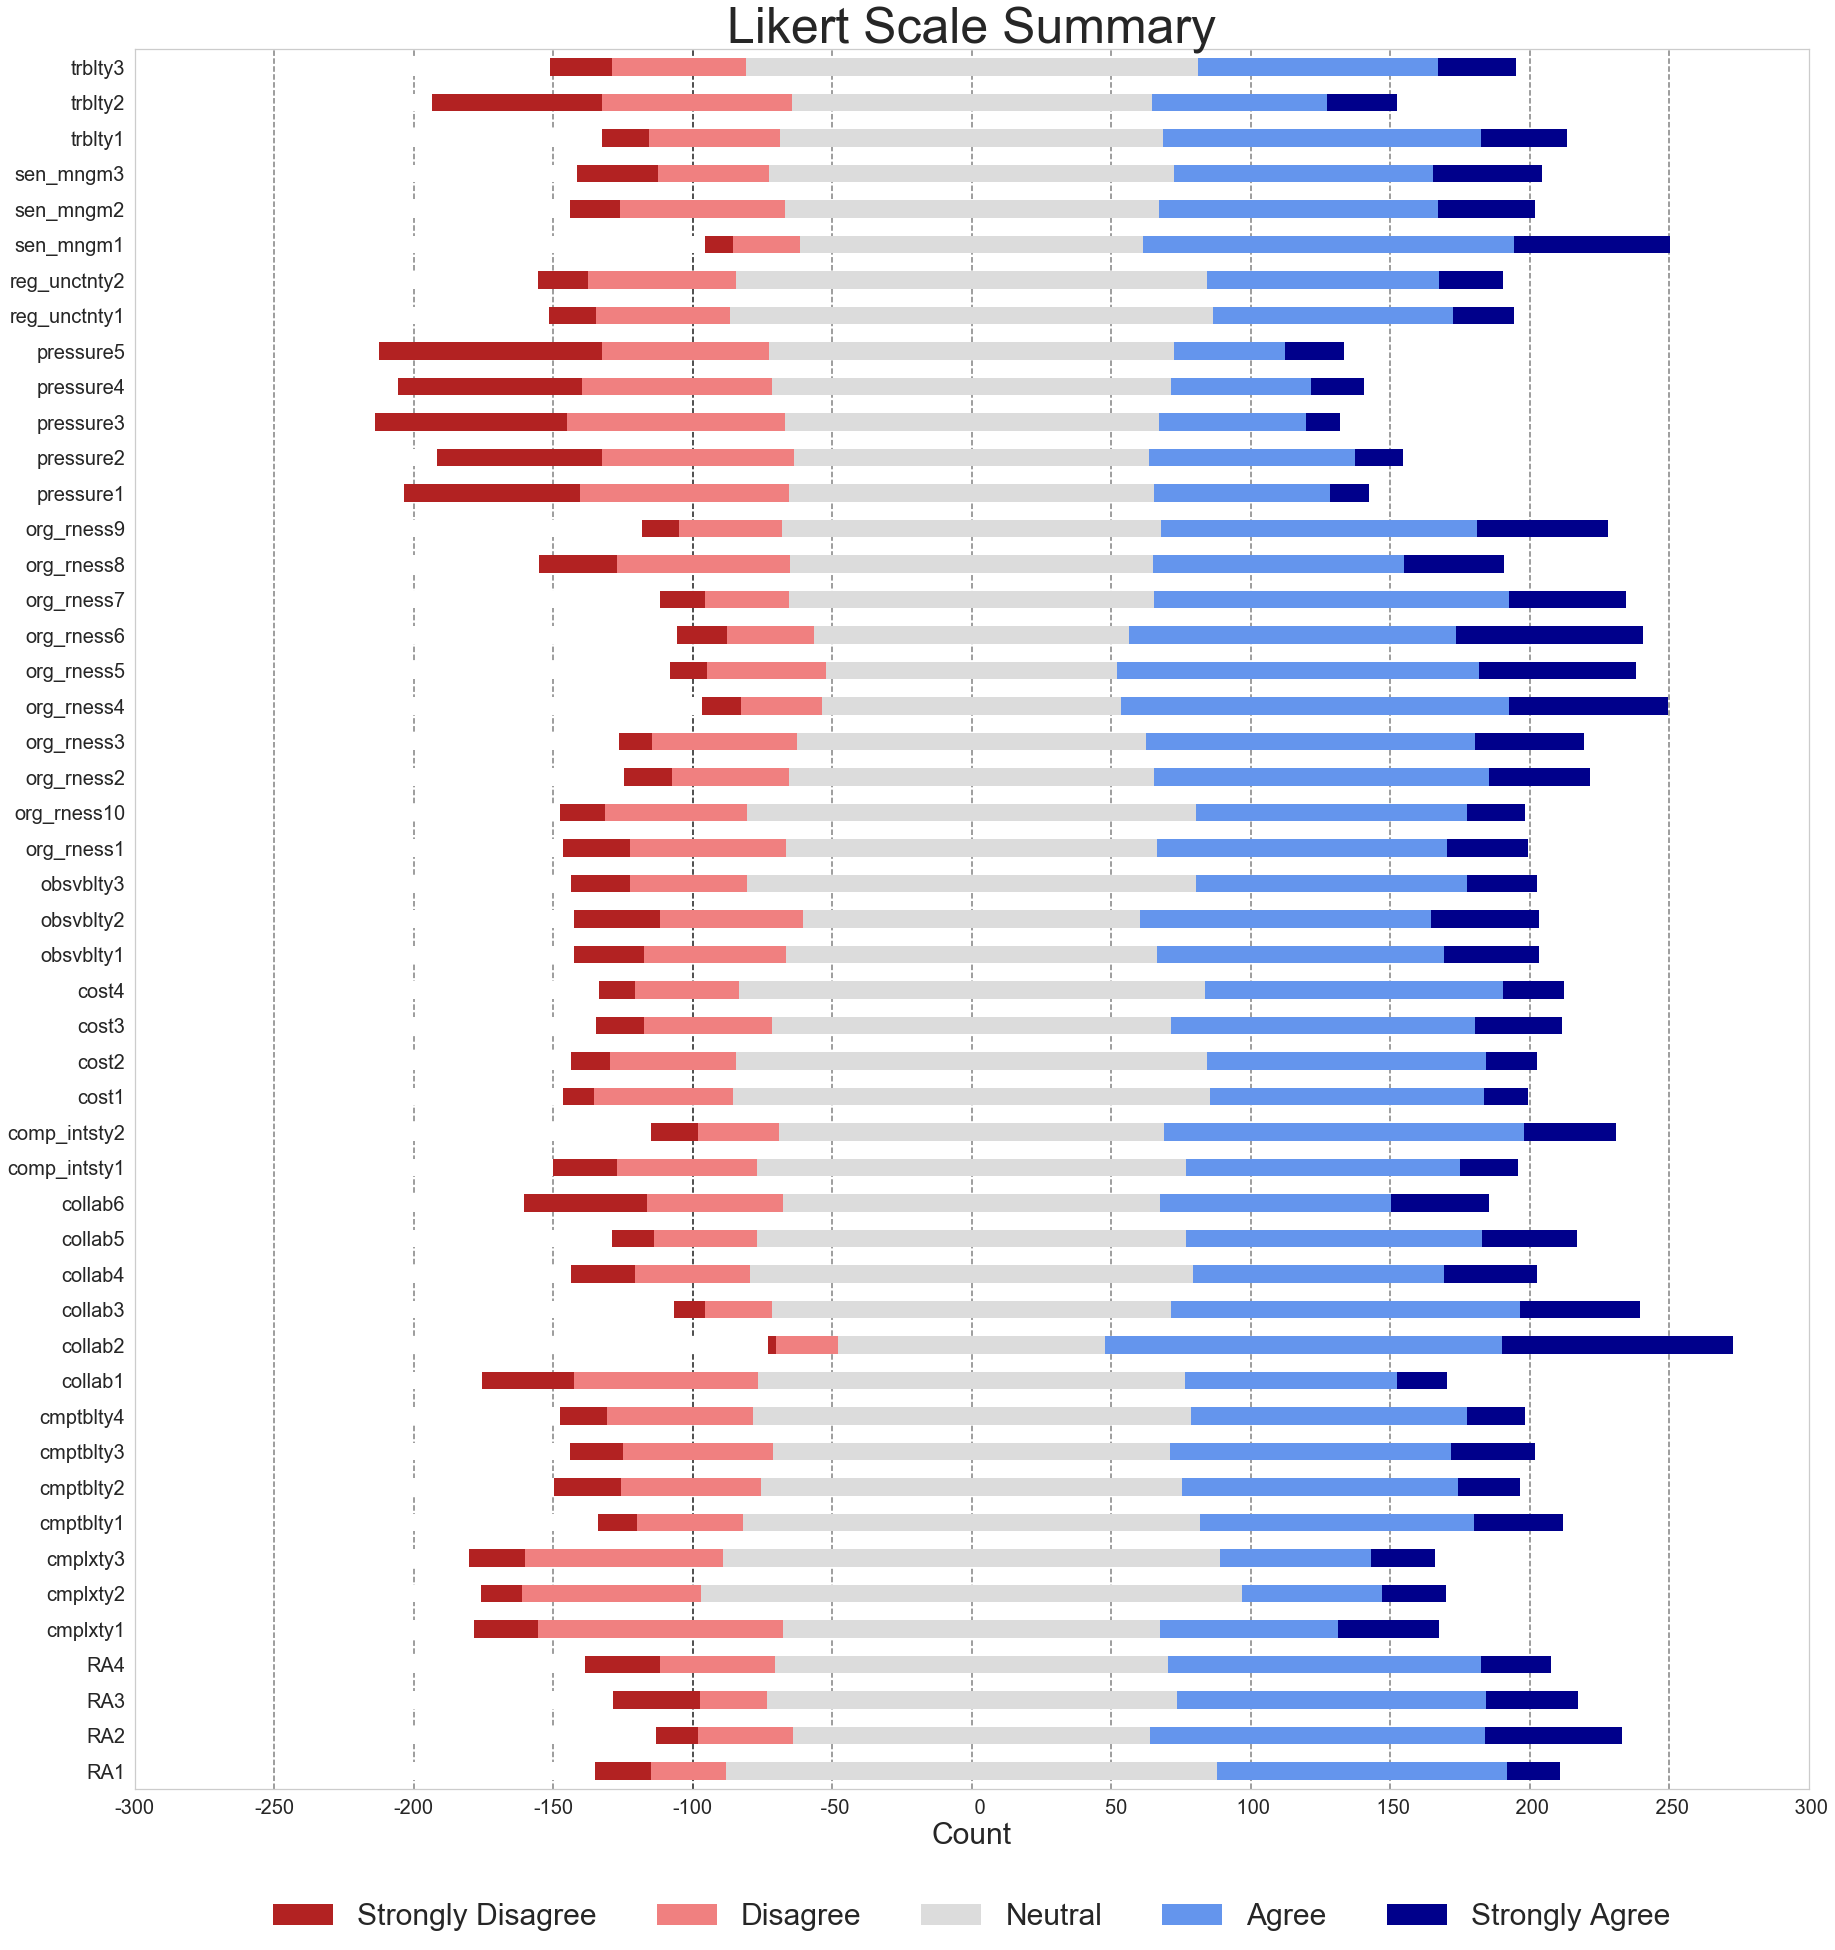

In [95]:
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams["figure.figsize"] = (30,40)

# load the data
df = df1

# Note that the first color is assigned to the 'invisible' column and is therefore white
likert_colors = ['white', 'firebrick','lightcoral','gainsboro','cornflowerblue', 'darkblue']

# find out the middle value
middles = df[["Strongly Disagree", "Disagree"]].sum(axis=1) + df["Neutral"]*.5

# define some margin (1.1) for the left hand side of the plot
longest = middles.max()*1.1

# insert the invisible column. Only ONCE!
df.insert(0, '', (middles - longest).abs())

# create the horizontal bar chart, using the subset 'all'
ax = df.dropna(axis=1).plot.barh(
    stacked=True, 
    color=likert_colors,
    edgecolor='none',
    fontsize=20)

# plot a vertical dashed line at 0
z = plt.axvline(longest, linestyle='--', color='black', alpha=.5)
a = plt.axvline(longest-150, linestyle='--', color='black', alpha=.5)
b = plt.axvline(longest-100, linestyle='--', color='black', alpha=.9)
c = plt.axvline(longest-50, linestyle='--', color='black', alpha=.5)
d = plt.axvline(longest+50, linestyle='--', color='black', alpha=.5)
e = plt.axvline(longest+100, linestyle='--', color='black', alpha=.5)
f = plt.axvline(longest+150, linestyle='--', color='black', alpha=.5)
g = plt.axvline(longest+200, linestyle='--', color='black', alpha=.5)
h = plt.axvline(longest-200, linestyle='--', color='black', alpha=.5)
i = plt.axvline(longest+250, linestyle='--', color='black', alpha=.5)
j = plt.axvline(longest-250, linestyle='--', color='black', alpha=.5)

# put this line at the background
z.set_zorder(-1)
a.set_zorder(-1)
b.set_zorder(-1)
c.set_zorder(-1)
d.set_zorder(-1)
e.set_zorder(-1)
f.set_zorder(-1)
g.set_zorder(-1)
h.set_zorder(-1)
i.set_zorder(-1)
j.set_zorder(-1)

# define some margin (1.05) for the right hand side of the plot
complete_longest = int(df.sum(axis=1).max()*1.05) 
plt.xlim(0, complete_longest)

# create custom tick positions and labels
xvalues = [longest-300+50*i for i in range(13)]
ax.grid(linestyle='-', alpha=0.9)

xlabels = ['{:4.0f}'.format(x-longest) for x in xvalues]
plt.xticks(xvalues, xlabels)

# Shrink current axis's height by 10% on the bottom to make room for the legend
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.8])

# create the legend
handler, label = ax.get_legend_handles_labels()
ax.legend(
    handler, 
    label, 
    loc='upper center', 
    bbox_to_anchor=(.5, -0.05), 
    ncol=5, 
    edgecolor='white',
    fontsize=30
)
ax.grid(False)
# set labels and title
plt.xlabel('Count',fontsize=30)
plt.ylabel('', fontsize=20)
plt.title('Likert Scale Summary', fontsize=50)
plt.savefig('/Users/malv/Desktop/Survey/plot/Likert_Scale_summary.jpeg')
plt.show()


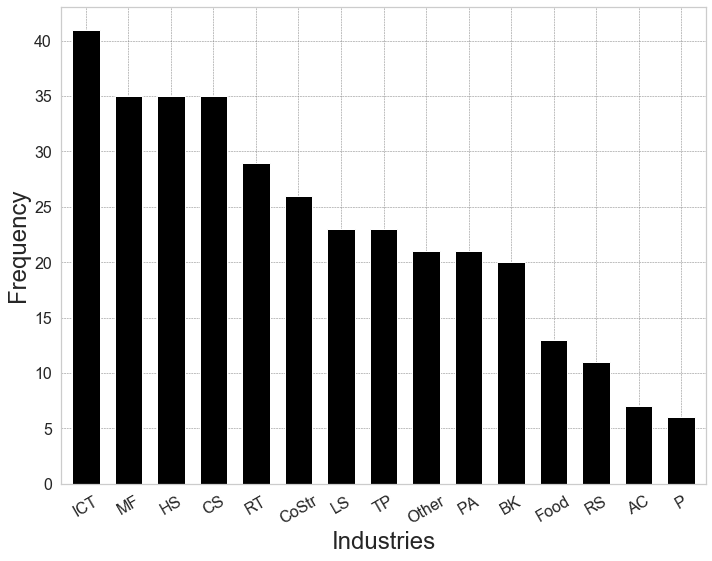

In [96]:
#Visualizing all the different industries
plt.rcParams['axes.facecolor'] = 'white'

industries = raw_data.drop(['Q2_16_TEXT','bc_stopped','bc_usecase', 'Q6_6_TEXT','Q43_11_TEXT'], axis=1)
industries["cmpny_ind"].replace({1: 'AC',
2 : 'BK',
3 : 'P',
4 : 'CoStr',
5 : 'Food',
6 : 'HS',
7 : 'ICT',
8 : 'CS',
9 : 'MF',
10 : 'PA',
11 : 'RT',
12 : 'RS',
13 : 'LS',
14 : 'TP',
15 : 'Other'}, inplace=True)

industries = industries.iloc[0:,18:19].dropna()

ax = industries['cmpny_ind'].value_counts().plot(kind='bar',
                                    figsize=(10,8),fontsize=16,color='black', width=0.65)

ax.set_xlabel("Industries",fontsize=24)
ax.set_ylabel("Frequency",fontsize=24)
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.xticks(rotation=30, ha='center')
plt.savefig('/Users/malv/Desktop/Survey/plot/Distribution_of_industries.png', dpi=plt.gcf().dpi) #Where you want to store the figure
plt.savefig('/Users/malv/Desktop/Survey/plot/Distribution_of_industries.png', dpi=200)#Where you want to store the figure
plt.show()

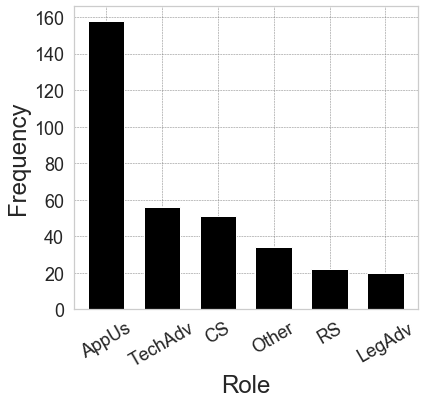

In [97]:
#Visualizing all the different blocckhain roles

bc_roles = raw_data.drop(['Q2_16_TEXT','bc_stopped','bc_usecase', 'Q6_6_TEXT','Q43_11_TEXT'], axis=1)

bc_roles = bc_roles.iloc[0:,21:22].dropna()
bc_roles["bc_role"].replace({1: 'TechAdv',
2 : 'LegAdv',
3 : 'RS',
4 : 'AppUs',
5 : 'CS',
6 : 'Other'}, inplace=True)

ax = bc_roles['bc_role'].value_counts().plot(kind='bar',
                                    figsize=(6,6),fontsize=18, color='black', width=0.65)
ax.set_xlabel("Role",fontsize=24)
ax.set_ylabel("Frequency",fontsize=24)
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.xticks(rotation=30, ha='center')
plt.savefig('/Users/malv/Desktop/Survey/plot/Distribution_of_blockchain_role.jpeg', dpi=plt.gcf().dpi)
plt.savefig('/Users/malv/Desktop/Survey/plot/Distribution_of_blockchain_role.jpeg', dpi=200)
plt.show()


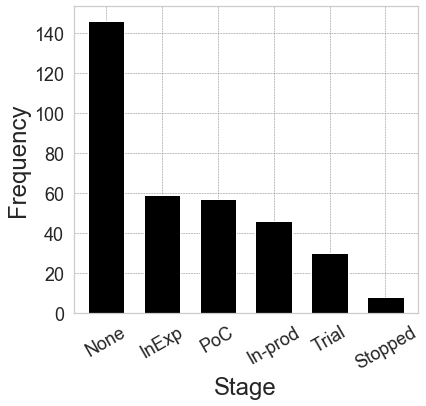

In [98]:
#Visualizing all the different blockchain stages

bc_stages = raw_data.drop(['Q2_16_TEXT','bc_stopped','bc_usecase', 'Q6_6_TEXT','Q43_11_TEXT'], axis=1)

bc_stages = bc_stages.iloc[0:,22:23].dropna()
bc_stages["bc_stage"].replace({1: 'None', 2 : 'InExp',
3 : 'PoC',
4 : 'Trial',
5 : 'In-prod',
6 : 'Stopped'}, inplace=True)

ax = bc_stages['bc_stage'].value_counts().plot(kind='bar',
                                    figsize=(6,6),fontsize=18, color='black', width=0.65)

ax.set_xlabel("Stage",fontsize=24)
ax.set_ylabel("Frequency",fontsize=24)
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.xticks(rotation=30, ha='center')
plt.savefig('/Users/malv/Desktop/Survey/plot/Distribution_of_stages.jpeg', dpi=plt.gcf().dpi)
plt.savefig('/Users/malv/Desktop/Survey/plot/Distribution_of_stages.jpeg', dpi=200)


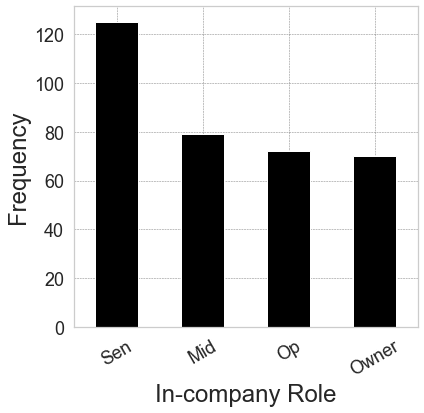

In [99]:
#Visualizing all the different in-company roles

role_cmpny = raw_data.drop(['Q2_16_TEXT','bc_stopped','bc_usecase', 'Q6_6_TEXT','Q43_11_TEXT'], axis=1)
role_cmpny = role_cmpny.iloc[0:,19:20]

role_cmpny['rolecmpny'].replace({1: 'Owner', 2 : 'Sen',
3 : 'Mid',
4 : 'Op'}, inplace=True)

ax = role_cmpny['rolecmpny'].value_counts().plot(kind='bar',
                                    figsize=(6,6),fontsize=18, color='black', width=0.5)
ax.set_xlabel("In-company Role",fontsize=24)
ax.set_ylabel("Frequency",fontsize=24)
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.xticks(rotation=30, ha='center')
plt.savefig('/Users/malv/Desktop/Survey/plot/Distriubtion_of_role_company.jpeg', dpi=plt.gcf().dpi)
plt.savefig('/Users/malv/Desktop/Survey/plot/Distriubtion_of_role_company.jpeg', dpi=200)

{'5': 19, '7': 42, '10': 14, '4': 59, '2': 57, '3': 63, '9': 51, '11': 19, '6': 36}


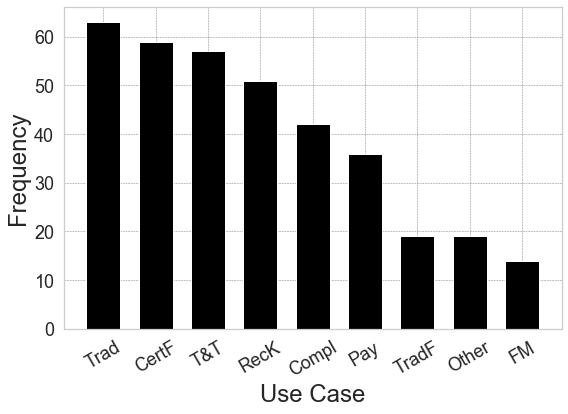

In [100]:
#Visualizing all the different blockchain use cases

bc_use_case = raw_data.drop(['Q2_16_TEXT','bc_stopped', 'Q6_6_TEXT','Q43_11_TEXT'], axis=1)
empty_list=[]
bc_use_case = bc_use_case.iloc[0:,23:24].dropna()
from more_itertools import split_after

for index, row in bc_use_case.iterrows():
    empty_list.append(row['bc_usecase'])

bc_use_case = bc_use_case["bc_usecase"].replace({2: 'T&T',
3 : 'Trad',
4 : 'CertF',
5 : 'TradF',
6 : 'Pay',
7 : 'Compl',
9 : 'RecK',
10 : 'FM',                                    
11 : 'Other'}, inplace=True)

the_list = [map(lambda x: x.strip(), item.split(',')) for item in empty_list]
new_list = [item for sub_list in the_list for item in sub_list]
#print(new_list)
dic={}

for element in set(new_list):
    dic[element]= new_list.count(element)
print(dic)

dic['T&T'] = dic.pop('2')
dic['Trad'] = dic.pop('3')
dic['CertF'] = dic.pop('4')
dic['TradF'] = dic.pop('5')
dic['Pay'] = dic.pop('6')
dic['Compl'] = dic.pop('7')
dic['RecK'] = dic.pop('9')
dic['FM'] = dic.pop('10')
dic['Other'] = dic.pop('11')

dic = dict(sorted(dic.items(), key=lambda item: item[1], reverse=True))

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams["figure.figsize"] = (8,6)
plt.bar(*zip(*dic.items()),color=['black'], width=0.65)
plt.ylabel('Frequency', fontsize=24)
plt.xlabel('Use Case', fontsize=24)
plt.xticks(fontsize=18, rotation='vertical')
plt.yticks(fontsize=18, rotation='horizontal')
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.xticks(rotation=30, ha='center')
plt.savefig('/Users/malv/Desktop/Survey/plot/Distribution_of_use_cases.jpeg', dpi=plt.gcf().dpi)
plt.savefig('/Users/malv/Desktop/Survey/plot/Distribution_of_use_cases.jpeg', dpi=200)
plt.show()


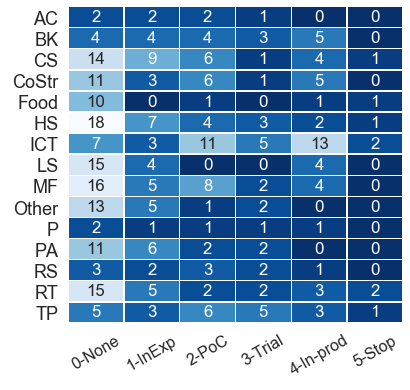

In [101]:
#Visualizing the co-occurances between the different industries and the blockchain stage

plt.figure(figsize=(6,6))
sb.set(font_scale=1.4)
industries = raw_data.drop(['Q2_16_TEXT','bc_stopped','bc_usecase', 'Q6_6_TEXT','Q43_11_TEXT'], axis=1)
industries["cmpny_ind"].replace({1: 'AC',
2 : 'BK',
3 : 'P',
4 : 'CoStr',
5 : 'Food',
6 : 'HS',
7 : 'ICT',
8 : 'CS',
9 : 'MF',
10 : 'PA',
11 : 'RT',
12 : 'RS',
13 : 'LS',
14 : 'TP',
15 : 'Other'}, inplace=True)

industries["bc_stage"].replace({1: '0-None', 2 : '1-InExp',
3 : '2-PoC',
4 : '3-Trial',
5 : '4-In-prod',
6 : '5-Stop'}, inplace=True)


y_axis = industries["bc_stage"]
x_axis = industries["cmpny_ind"]
sb.heatmap(pd.crosstab([x_axis], [y_axis]),
            cmap="Blues_r", annot=True, linewidths=.5, cbar=False)
plt.ylabel(' ', fontsize=1)
plt.xlabel(' ', fontsize=1)
plt.xticks(fontsize=16, rotation='vertical')
plt.yticks(fontsize=18, rotation='horizontal')
plt.tight_layout()
plt.xticks(rotation=30, ha='center')

plt.savefig('/Users/malv/Desktop/Survey/plot/covariances_of_industries_and_bc_stage.jpeg', dpi=plt.gcf().dpi)
plt.savefig('/Users/malv/Desktop/Survey/plot/covariances_of_industries_and_bc_stage.jpeg', dpi=200)

# 5. Spearman Correlation

In [102]:
# Now let's do the spearman correlation for the summed up values
# Here, we see indeed some correlations
correlation=survey_no_stopped.iloc[:,:].corr(method='spearman').style.background_gradient(cmap='coolwarm')
survey_no_stopped.iloc[:,:].corr(method='spearman').to_csv("/Users/malv/Desktop/Survey/correlations.csv")

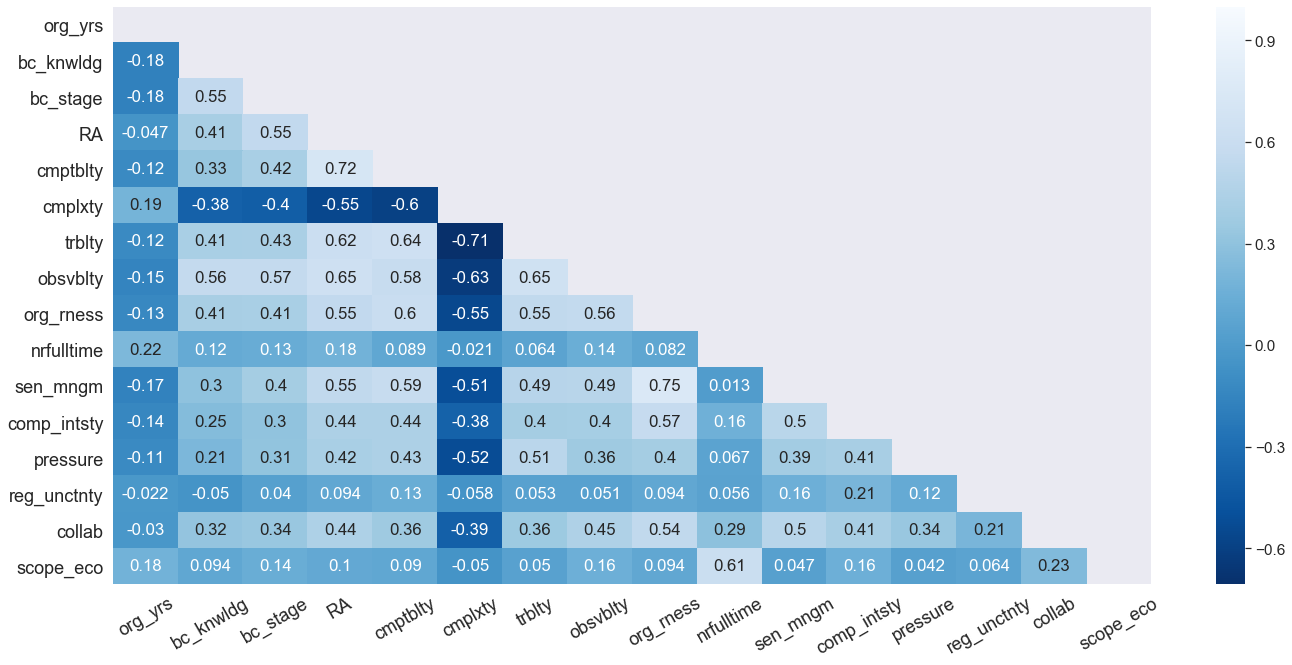

In [103]:
sb.set(font_scale=1.4)
cmap = plt.get_cmap('Blues_r')

correlation_clean = survey_no_stopped.drop(['cmpny_ind','rolecmpny', 'bc_role'], axis=1)
corr = correlation_clean.iloc[:,:].corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
sb.heatmap(correlation_clean.iloc[:,:].corr(method='spearman'), mask=mask,annot=True, 
            cmap=cmap, cbar=True, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")

plt.xticks(fontsize=18, rotation='vertical')
plt.yticks(fontsize=18, rotation='horizontal')
plt.tight_layout()
plt.xticks(rotation=30, ha='center')
plt.savefig('/Users/malv/Desktop/Survey/plot/Correlation_Matrix.jpeg')

In [106]:
#First, creating an empty list to store values
empty_list = []

#Secondly, creating an array to store values
numpy_data = np.array([[1, 2], [3, 4]])
df = pd.DataFrame(data=numpy_data)

#We loop and need a counter
count = 0

for x in survey_no_stopped.columns:
    empty_list.append(x)    #Now we look for significant values. If we find them then we add them to empty_list
    for y in survey_no_stopped.columns:
        if y in empty_list:
            continue
        else:
            p_value= pg.corr(x=survey_no_stopped[x], y=survey_no_stopped[y], method='spearman') #perform correlation
            float_p_value = float(p_value['p-val']) #take p value
            round_p_value = round(float_p_value,5) #round it to five decimals
            correlation = (float(p_value['r'])) #take p_value
            correlation2 = round(correlation,5) #round it to five decimals
            x_list = []
            if ((float_p_value < 0.05) and (correlation2 > 0.3)) or ((float_p_value < 0.05) and (correlation2 < -0.3)):                
                df = df.append([[x,y,round_p_value, correlation2]], ignore_index=True)
                
df= df.rename(columns={0:'Question1', 1: "Question2", 2: "p_value", 3:"correlation"})
df= df.drop([0, 1])

print(df)

df.to_csv("/Users/malv/Desktop/Survey/correlations_and_p-value.csv")

      Question1   Question2  p_value  correlation
2     rolecmpny  nrfulltime      0.0      0.33583
3     bc_knwldg     bc_role      0.0     -0.34849
4     bc_knwldg    bc_stage      0.0      0.55199
5     bc_knwldg          RA      0.0      0.40833
6     bc_knwldg    cmptblty      0.0      0.33054
..          ...         ...      ...          ...
63     sen_mngm    pressure      0.0      0.38652
64     sen_mngm      collab      0.0      0.49533
65  comp_intsty    pressure      0.0      0.40785
66  comp_intsty      collab      0.0      0.40714
67     pressure      collab      0.0      0.33727

[66 rows x 4 columns]
